In [779]:
import iResNet

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import torch.nn.functional as F

import importlib
importlib.reload(iResNet)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# iResNet

In [866]:
import test
importlib.reload(test)

<module 'test' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/test.py'>

In [964]:
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

In [965]:
model = iResNet.Sequential(iResNet.Nonlinear(dim=3, method='RealNVP'),
                           iResNet.BatchNorm1d(3),
                           iResNet.Nonlinear(dim=3, method='NICE'),
                           iResNet.BatchNorm1d(3),
                           iResNet.Nonlinear(dim=3, method='iResNet'),
                           iResNet.Linear(3)
                          )
model.eval()
x = torch.Tensor([[1,2,3],
                  [4,5,6]])

In [966]:
x.requires_grad = True
model.computing_p(True)
y, log_p, log_det = model(x)
y

tensor([[-0.1524,  2.0053,  0.7008],
        [ 1.5900,  2.8629,  4.4310]], grad_fn=<MmBackward>)

In [967]:
x.requires_grad = True
model.computing_p(False)
y = model(x)
y

tensor([[-0.1772,  2.0264,  0.7313],
        [ 1.5008,  2.9699,  4.6239]], grad_fn=<MmBackward>)

In [968]:
model.inverse(y)

tensor([[1.0000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.0000]], grad_fn=<AddBackward0>)

# NICE

In [761]:
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

In [771]:
model = iResNet.Nonlinear(dim=3, method='RealNVP')

In [772]:
x = torch.Tensor([[1,2,3],
                  [4,5,6]])

model.eval()
y = model(x)
y

tensor([[ 0.7574,  3.2242,  7.5897],
        [ 5.8476, 10.0628, 15.7218]], grad_fn=<AddBackward0>)

In [773]:
model.inverse(y)

tensor([[1.0000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.0000]], grad_fn=<AddBackward0>)

# Real NVP

TODO: When s is too close to zero, it cannot inverse

When log_s is to large, s will be NaN

In [647]:
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

In [663]:
model = iResNet.Sequential(iResNet.RealNVP(2),
                           iResNet.BatchNorm1d(2),
                           iResNet.RealNVP(2), iResNet.Linear(2))

In [671]:
x = torch.Tensor([[1,2],
                  [4,5]])

model.eval()
y, log_p, logdet = model(x)
y

tensor([[1.0177, 2.0027],
        [4.5006, 4.4941]], grad_fn=<MmBackward>)

In [672]:
model.inverse(y)

tensor([[1.0000, 2.0000],
        [4.0000, 5.0000]], grad_fn=<AddBackward0>)

In [633]:
model[3].W()

tensor([[-0.5895,  0.8078],
        [ 0.8078,  0.5895]], grad_fn=<MmBackward>)

In [666]:
lf = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(100):
    optimizer.zero_grad()
    target = torch.zeros((64, 2))
    x = torch.randn((64,2))
    
    y,_,_ = model(x)
    loss = lf(x, y)
    loss.backward()
    optimizer.step()

In [667]:
model[3].W()

tensor([[ 0.9402, -0.0957],
        [ 0.1030,  1.0655]], grad_fn=<MmBackward>)

# NN

In [97]:
model = nn.Sequential(nn.Linear(1, 8), nn.ELU(), nn.Linear(8,8), nn.ELU(), nn.Linear(8,1))

In [103]:
x = torch.linspace(-3, 3, 50).reshape(-1,1)
y = model(x)

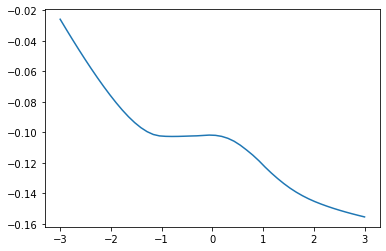

In [106]:
plt.plot(x.reshape(-1), y.reshape(-1).detach())

# Invertible Linear

In [549]:
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

In [550]:
fcn = iResNet.Linear(3)

In [551]:
y, p, logdet = fcn(torch.Tensor([[1,2,3], [-1,2,-3]]))
y

tensor([[-1.7318,  5.7556,  2.0143],
        [ 1.0602, -5.3518,  1.9082]], grad_fn=<MmBackward>)

In [552]:
fcn.inverse(y)

tensor([[ 1.0000,  2.0000,  3.0000],
        [-1.0000,  2.0000, -3.0000]], grad_fn=<MmBackward>)

In [553]:
fcn.W()

tensor([[ 0.6966, -0.1679, -0.6975],
        [-0.6917,  0.1010,  2.0818],
        [ 0.1905,  0.9806, -0.0458]], grad_fn=<MmBackward>)

In [546]:
torch.sum(fcn.log_s)

tensor(9.3132e-08)

In [548]:
help(F.linear)

Help on function linear in module torch.nn.functional:

linear(input: torch.Tensor, weight: torch.Tensor, bias: Union[torch.Tensor, NoneType] = None) -> torch.Tensor
    Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.
    
    This operator supports :ref:`TensorFloat32<tf32_on_ampere>`.
    
    Shape:
    
        - Input: :math:`(N, *, in\_features)` N is the batch size, `*` means any number of
          additional dimensions
        - Weight: :math:`(out\_features, in\_features)`
        - Bias: :math:`(out\_features)`
        - Output: :math:`(N, *, out\_features)`



# FCN

In [107]:
model = iResNet.FCN(2, 2)
model

FCN(
  (net): SNFCN(
    (g): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): GELU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): GELU()
      (4): Linear(in_features=16, out_features=2, bias=True)
    )
  )
  (noise): NormalDistribution()
)

In [108]:
x = torch.Tensor([[1,2], [3,4]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[1.0678, 2.0415],
        [3.1557, 4.0456]], grad_fn=<SliceBackward>)

In [109]:
model.inverse(y)

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000]])

## Sequential

In [113]:
model = iResNet.Sequential(iResNet.FCN(8, 8),
                           iResNet.FCN(8, 8),
                           iResNet.FCN(8, 2))
print(model)

Sequential(
  (0): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (1): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (2): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDi

In [117]:
x = torch.Tensor([[1,0,0,1,1,0,0,1]])
x.requires_grad = True

y, logp, log_det = model(x)
y

tensor([[0.9518, 0.1344]], grad_fn=<SliceBackward>)

In [120]:
model.inverse(y)

tensor([[ 0.9152,  0.0911,  1.7088,  1.6560,  0.9402,  0.2863,  1.4141, -0.5172]])

In [111]:
x = torch.Tensor([[1,2], [3,4], [-3,1]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[ 1.1161,  2.0918],
        [ 3.0046,  4.1585],
        [-2.6586,  0.9173]], grad_fn=<SliceBackward>)

In [112]:
model.inverse(y)

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [-3.,  1.]])

In [62]:
x = torch.Tensor([[1,2], [3,4], [-2, 1]])
x.requires_grad = True
model.eval()

y = model(x)
y

tensor([[ 0.8402,  2.0901],
        [ 2.7896,  4.0990],
        [-2.1957,  1.1529]], grad_fn=<SliceBackward>)

In [20]:
model.inverse(y.detach())

tensor([[ 1.0000,  2.0000],
        [ 3.0000,  4.0000],
        [-2.0000,  1.0000]])

# Conv1d

In [84]:
model = iResNet.Sequential(iResNet.Conv1d(channel=2, kernel_size=3),
                           iResNet.Conv1d(channel=2, kernel_size=1),
                           iResNet.Conv1d(channel=2, kernel_size=3))
model

Sequential(
  (0): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
  (1): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(1,), stride=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(1,), stride=(1,))
      )
    )
  )
  (2): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
)

In [85]:
x = torch.Tensor([[[1,2,3,4,5],[-1,-2,-3,-4,-5]], [[1,2,0,4,5],[-1,-2,0,-4,-5]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[ 9.8334e-01,  2.0234e+00,  3.0385e+00,  4.2037e+00,  5.1804e+00],
         [-1.1709e+00, -2.1974e+00, -3.2554e+00, -4.2121e+00, -5.1788e+00]],

        [[ 1.0371e+00,  2.0080e+00, -2.1772e-03,  4.1299e+00,  5.2609e+00],
         [-1.1364e+00, -2.1973e+00, -2.2076e-01, -4.2422e+00, -5.1010e+00]]],
       grad_fn=<AddBackward0>)

In [86]:
model.inverse(y)

tensor([[[ 1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -3.0000e+00, -4.0000e+00, -5.0000e+00]],

        [[ 1.0000e+00,  2.0000e+00,  1.4901e-08,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -4.4703e-08, -4.0000e+00, -5.0000e+00]]])

# Conv2d

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
model = iResNet.Sequential(iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3)
                          )

In [125]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(100):
    optimizer.zero_grad()
    x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]]]])
    x.requires_grad = True
    
    target = torch.Tensor([[[[0,0,0],[0,1,0],[0,0,0]], [[0,0,0],[0,1,0],[0,0,0]],[[0,0,0],[0,1,0],[0,0,0]]]])
    y, logp, logdet = model(x)
    loss = nn.MSELoss()(y, target)
    loss.backward()
    
    optimizer.step()

In [126]:
x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]]]])
x.requires_grad = True

y, logp, logdet = model(x)
y.shape

torch.Size([1, 3, 3, 3])

In [16]:
model.inverse(y)

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  5.5879e-09],
          [ 3.7253e-09,  1.0000e+00, -3.7253e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-6.9849e-09,  1.0000e+00, -6.9849e-09],
          [-1.8626e-09,  1.0000e+00,  9.3132e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  9.7789e-09],
          [-1.8626e-09,  1.0000e+00, -6.9849e-09]]]])

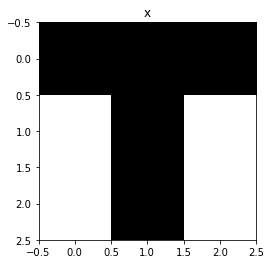

In [133]:
plt.imshow(1-x[0,0].detach(), cmap='gray')
plt.title('x')
#plt.savefig('cov2d_x.png')
plt.show()

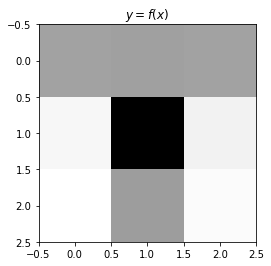

In [135]:
plt.imshow(1-y[0,0].detach(), cmap='gray')
plt.title('$y=f(x)$')
#plt.savefig('cov2d_y.png')
plt.show()

In [136]:
xhat = model.inverse(y)
xhat

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-3.3528e-08,  1.0000e+00,  7.4506e-09],
          [ 2.6077e-08,  1.0000e+00,  7.4506e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00, -8.9407e-08],
          [ 4.8429e-08,  1.0000e+00,  2.9802e-08]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-1.4901e-08,  1.0000e+00,  7.4506e-09],
          [ 2.2352e-08,  1.0000e+00,  7.4506e-09]]]])

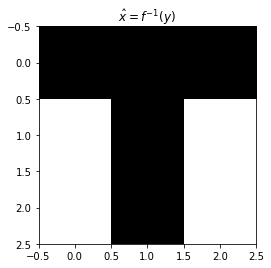

In [137]:
plt.imshow(1-xhat[0,0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')
#plt.savefig('cov2d_x_hat.png')
plt.show()

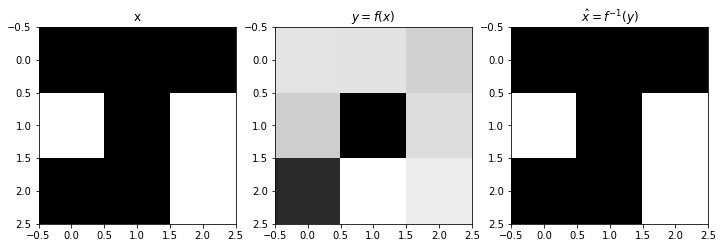

In [107]:
fig = plt.figure(figsize=(12,4))

fig = plt.subplot(131)
plt.imshow(1-x[0, 0].detach(), cmap='gray')
plt.title('x')

fig = plt.subplot(132)
plt.imshow(1-y[0, 0].detach(), cmap='gray')
plt.title('$y=f(x)$')

fig = plt.subplot(133)
plt.imshow(1-xhat[0, 0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')

#plt.savefig('../images/cov2d.png')
plt.show()

In [6]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

In [48]:
class _MuVar(nn.Module):
    r'''
    Abstract class of MuVar
    '''
    def __init__(self, feature_in, feature_out, eps=1e-8):
        super(_MuVar, self).__init__()
        self.feature_in = feature_in
        self.feature_out = feature_out
        self.feature_y = feature_out
        self.feature_z = feature_in - feature_out
        self.eps = eps
    
    def _initialize_weights(self):
        raise NotImplementedError('initialization not implemented!')
    
    def exp_var(self, log_var):
        return self.eps + torch.exp(log_var)


class MuVarVector(_MuVar):
    def __init__(self, feature_in, feature_out):
        super(MuVarVector, self).__init__(feature_in, feature_out)
        self.linear_mu = nn.Linear(self.feature_y, self.feature_z)
        self.linear_log_var = nn.Linear(self.feature_y, self.feature_z)
        self._initialize_weights()
    
    def _initialize_weights(self):
        nn.init.xavier_uniform_(self.linear_mu.weight)
        nn.init.zeros_(self.linear_mu.bias)
        nn.init.zeros_(self.linear_log_var.weight)
        nn.init.zeros_(self.linear_log_var.bias)

    def forward(self, y):
        mu = self.linear_mu(y)
        var = self.exp_var(self.linear_log_var(y))
        log_det = -1 * torch.log(var).sum(dim=-1)
        return mu, var, log_det


class MuVar1d(_MuVar):
    def __init__(self, feature_in, feature_out):
        super(MuVar1d, self).__init__(feature_in, feature_out)
        self.conv_mu = nn.Conv1d(in_channels=self.feature_y, out_channels=self.feature_z, kernel_size=3)
        self.conv_log_var = nn.Conv1d(in_channels=self.feature_y, out_channels=self.feature_z, kernel_size=3)
        self._initialize_weights()
    
    def _initialize_weights(self):
        nn.init.xavier_uniform_(self.conv_mu.weight)
        nn.init.zeros_(self.conv_mu.bias)
        nn.init.zeros_(self.conv_log_var.weight)
        nn.init.zeros_(self.conv_log_var.bias)
    
    def forward(self, y):
        mu = self.conv_mu(y)
        var = self.exp_var(self.conv_log_var(y))
        batch = var.shape[0]
        log_det = -1 * torch.log(var).reshape(batch, -1).sum(dim=-1)
        return mu, var, log_det


class MuVar2d(_MuVar):
    def __init__(self, num_feature):
        super(MuVar2d, self).__init__(num_feature)


class MuVar(nn.Module):
    r'''
    Estimate mean and var when doing feature rescale.
    '''
    def __init__(self, feature_in, feature_out):
        super(MuVar, self).__init__()
        self.initialized = False
        self.feature_in = feature_in
        self.feature_out = feature_out
    
    def _initialize(self, y):
        # initialize mu and var based on shape of y
        batch, *shape = y.shape
        num_features = shape[0]
        self.initialized = True
        if len(shape) == 1:
            self.mu_var = MuVarVector(self.feature_in, self.feature_out)
            return
        if len(shape) == 2:
            self.mu_var = MuVar1d(self.feature_in, self.feature_out)
            return
        if len(shape) == 3:
            self.mu_var = MuVar2d(self.feature_in, self.feature_out)
            return
    
    def forward(self, y):
        if not self.initialized:
            self._initialize(y)
        
        return self.mu_var(y)

In [49]:
model = MuVar(7, 4)

In [50]:
y = torch.randn(2, 4, 10)

In [51]:
model(y)

(tensor([[[ 0.5101, -0.4526,  0.7442, -1.0809,  1.0826,  1.0608,  0.8303,
           -0.8194],
          [-0.6540, -0.9358, -0.5490,  1.4620, -0.6793, -1.2207,  1.8146,
           -0.4576],
          [ 0.4398,  0.3122,  2.2329, -0.3802, -0.2253,  0.1126, -1.2366,
            0.2262]],
 
         [[ 0.5818, -0.3430, -0.4689,  0.3749, -1.0408,  0.2286, -0.9115,
            0.5698],
          [-2.9417, -0.6848, -0.0546, -0.6493,  0.4316, -0.9440, -0.9039,
           -1.9271],
          [ 0.5617,  0.3300, -0.0517,  0.5858,  0.6724,  0.0683,  0.5490,
            1.1368]]], grad_fn=<SqueezeBackward1>),
 tensor([[[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<AddBackward0>),
 tensor([-0., -0.], grad_fn=<MulBackward0>))